# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
# In this case the *.csv Dataset is in the same folder as our *.ipynb file, so we don't need to specify the address and then change in the \ to /.
df = pd.read_csv('foodhub_order.csv') 

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

- The DataFrame from it's source has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Write your code here
# Calculating the number of raws and columns in our Dataset

print('The upper table consists of ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns.')

The upper table consists of 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- Except the integer and float values we try to reduce the memory usage by converting 3 object values to category. At this time as we can see the memory usage is 133.6+KB

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [5]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

df['restaurant_name'] = df['restaurant_name'].astype('category') # Convert 'restaurant_name' column from object to category
df['cuisine_type'] = df['cuisine_type'].astype('category') # Convert 'cuisine_type' column from object to category
df['day_of_the_week'] = df['day_of_the_week'].astype('category') # Convert 'day_of_the_week' column from object to category

# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
- Obviously the capacity with the categorical values is less than before and reduced to 102.7+KB.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
## *.describe() show us a table with all the min-max-mean-median-quartial values 
## as well as the number of entries from the numerical columns.
#---------------------------------------------------------------------------------------
# of course the first two column don't have any import value for us 
# as they are a simple a unique recognition number for every orders and every customer.

df.describe() 

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [7]:
# extracting every numeric value by converting it in string with str() and always between '+'' symbols.
# Text inside print() always in ''.
print('The minimum preparation time after ordering is '+str(df['food_preparation_time'].min())+' minutes.')
print('The maximum preparation time after ordering is '+str(df['food_preparation_time'].max())+' minutes.')


TabMean = df['food_preparation_time'].mean()
# in order to round the after commas to two digits, we assigh a variable for the mean 
# and then we excecute it the round by giving the variable and the willing number of digits after comma.

print('The average preparation time after ordering is approximately '+str(round(TabMean, 2))+' minutes.')

The minimum preparation time after ordering is 20 minutes.
The maximum preparation time after ordering is 35 minutes.
The average preparation time after ordering is approximately 27.37 minutes.


### Observations:
- Mean is approximately as same as the Q2 that means 'food_preparation_time' column has possible normal distribution curve.


### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Assign to a variable the 'Not Given' objects from column 'rating'
NonRated = df['rating']=='Not given' 
# calculating the summary of those entries.
print('There are '+str(NonRated.sum())+' not rated orders.') 

There are 736 not rated orders.


#### Observations:
- There is a big number of non-rated ratings in this dataset.

## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [9]:
# Function to plot a boxplot and a histogram along the same scale. 
# Run this chunk of code to define this function - this will be very useful in data visualisation.
# This function is same as the one used in the Mentorship Case Studies earlier. 

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=15, horizontalalignment='right')
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

###   Cuisine Type 

#### ( Number of Orders & Percentage per cuisine)

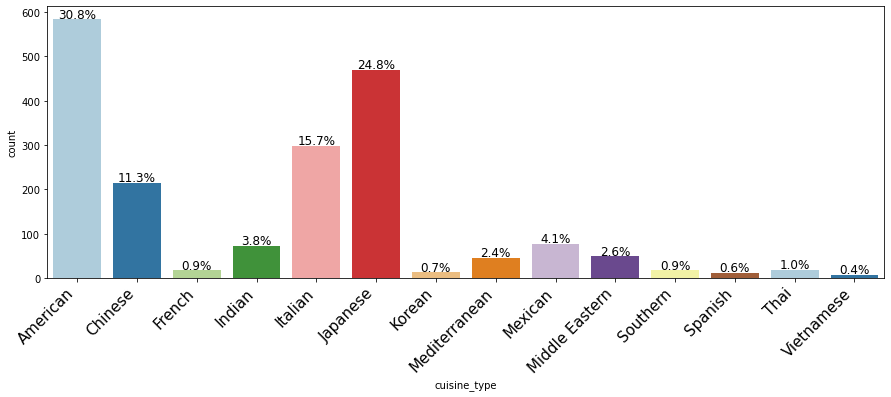

In [11]:
# A barplot by calling the defined funtion labeled_barplot()above. 
# That gives us the percentage of orders in our dataset for every unique type of cuisines. 
labeled_barplot(df, 'cuisine_type', perc=True) 

### Cost of the Orders

#### (Number of orders at the particular price)

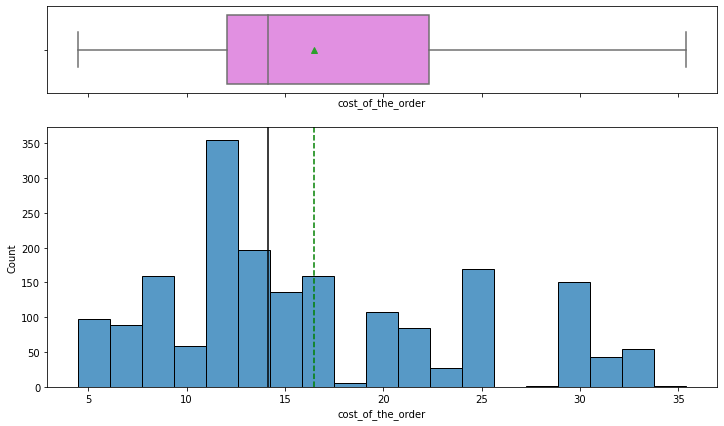

In [12]:
# A boxplot by calling the defined function histogram_boxplot().
# Except the number of the orders at every cost (y axis), we finding also here the median and the mean values of this column.
histogram_boxplot(df, 'cost_of_the_order')

### Day of the Week

#### (Number and percentage of orders on weekdays or weekends)

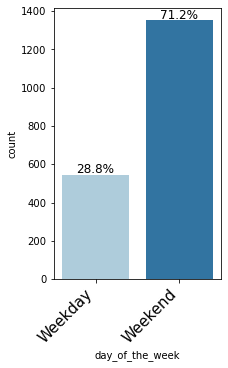

In [13]:
labeled_barplot(df, 'day_of_the_week', perc=True)

### Rating 
#### ( Number and percentage of tables with &  without 'Not given' values)

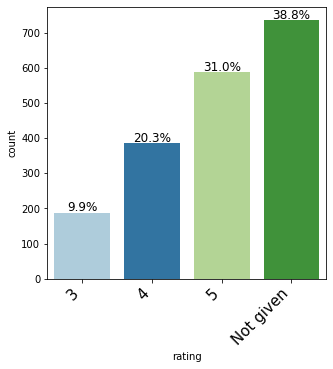

In [14]:
# including 'not given'
labeled_barplot(df, 'rating', perc=True)

In [15]:
# In order to make some arithmetic operations, we exclude the non numerical values and then we covert the column to integer 
Rated = df[df['rating'] != 'Not given'].copy()
Rated['rating'] = Rated['rating'].astype('int64')

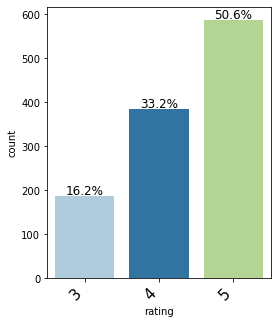

In [16]:
# without 'not given'
labeled_barplot(Rated, 'rating', perc=True)

### Food preparation
#### (Number of orders that prepared at that time)

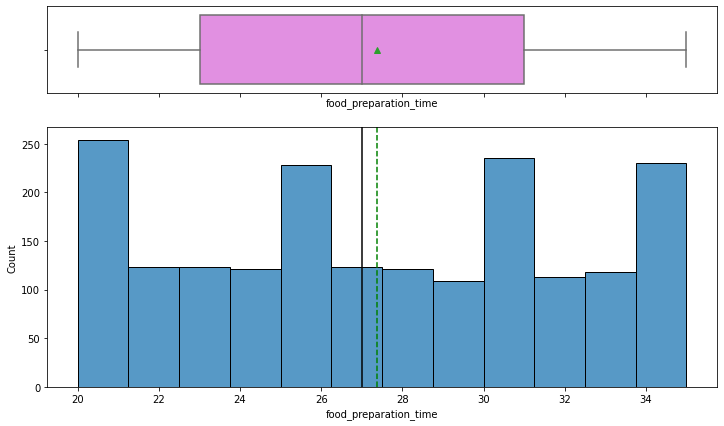

In [17]:
histogram_boxplot(df, 'food_preparation_time')

### Delivery Time
#### (Number of orders that delivered at that time)

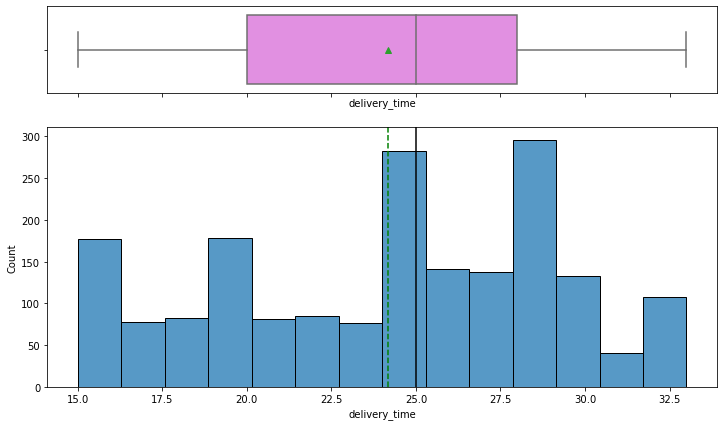

In [18]:
histogram_boxplot(df, 'delivery_time')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [19]:
# we define a variable for the number of each restaurant that shows in dataset from the highest number to the lowest.
TopOrders = df['restaurant_name'].value_counts() 
# printing the top 5 restaurants in orders [:5] --> 0, 1, 2, 3, 4 rows
print(TopOrders[:5])

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


In [20]:
#printing the sum of these entries for later use.
print('Τotal sum of orders of the first 5 restaurants '+ str(TopOrders[:5].sum()))

Τotal sum of orders of the first 5 restaurants 634


#### Observations:
- Approximately the 1/3 of the whole orders, comes from these 5 restaurants.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
# define a variable that extracts the weekend orders from the 'day_of_the_week' column. 
at_weekends = df[df['day_of_the_week'] == 'Weekend']
# with *value_counts.head(1) to pick up only the FIRST row of the value_counts result.
print(at_weekends['cuisine_type'].value_counts().head(1)) 

American    415
Name: cuisine_type, dtype: int64


#### Observations:
- American Cuisine is by far the most popular at weekends in 'New York' with 415 orders.

- About the 1/5 of the whole orders refering to American type of cuisine that have been ordered at weekend.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [22]:
# define a variable that collects only the values that satisfies our condition
more_than_20 = df['cost_of_the_order'] > 20.0
# in a new variable we devide the sum of the willing range of orders to the total number of entries of the table.
per_from_20 =  (more_than_20.sum() * 100) / df['cost_of_the_order'].count()
# printing by rounding the after comma digits of the percentage to 2.
print('The percentage from orders above 20 € is: ' + str(per_from_20.round(2)) + '%')

The percentage from orders above 20 € is: 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [23]:
# define variable for mean value of the 'delivery_time' column.
DelMean = df.delivery_time.mean()
# Set for the value DelMean the after comma to 2 digits with 'round'. 
print('The delivery time is approximately ',round(DelMean, 2), 'minutes')

The delivery time is approximately  24.16 minutes


#### Observations:
- The time only for the delivery (without food preparation) is round 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [24]:
#create a new dataframe with the asking result
# we reseting the indexes at this dataframe
set_top = pd.DataFrame(df.customer_id.value_counts().reset_index())
# Giving name to each column to identify better the numbers at each column. 
set_top.columns = ['customer_id', 'num_of_orders']
# head() without number inside the parenthesis gives us the first 5 
# display() instead of print(), for better looking result !
display(set_top.head()) 

,customer_id,num_of_orders
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Cuisine Vs Rating

In [25]:
# grouping the dataset to the rating mean value of every cuisine type 
rat_mean = Rated.groupby(['cuisine_type'])['rating'].mean()
# sort values from highest to lowest
ratery = rat_mean.sort_values(ascending=False).reset_index()
ratery

,cuisine_type,rating
0,Spanish,4.833333
1,Thai,4.666667
2,Indian,4.540000
3,Mexican,4.416667
4,Japanese,4.373626
5,Italian,4.360465
6,Chinese,4.338346
7,Southern,4.307692
8,French,4.300000
9,American,4.298913


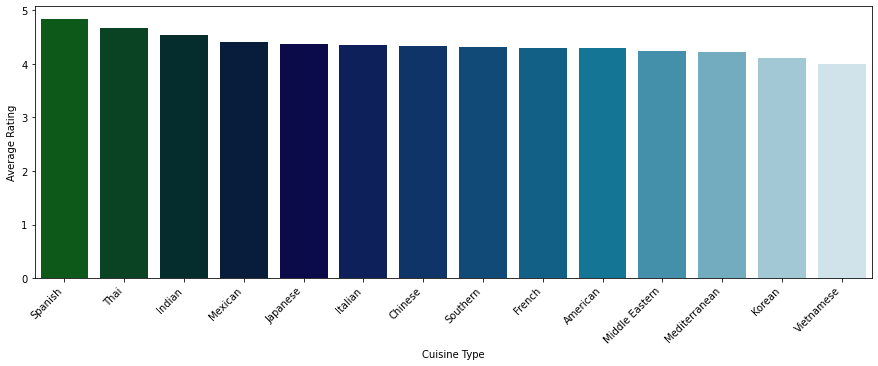

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(x = "cuisine_type", y = "rating", data = ratery, palette = 'ocean', order=ratery['cuisine_type'])
plt.xlabel('Cuisine Type') # creating our label names for x and y axis
plt.ylabel('Average Rating')
plt.xticks(rotation = 45, horizontalalignment='right') # names to be exactly under the column that they describe
plt.show()

### Calculating the mean cost of order for every cuisine type

In [27]:
# grouping in order to find and then to show the mean cost of order for every cuisine type
cost_mean = df.groupby(['cuisine_type'])['cost_of_the_order'].mean()
every = cost_mean.sort_values(ascending=False).reset_index()
every

,cuisine_type,cost_of_the_order
0,French,19.793889
1,Southern,19.300588
2,Thai,19.207895
3,Spanish,18.994167
4,Middle Eastern,18.820612
5,Mexican,16.933117
6,Indian,16.919726
7,Italian,16.418691
8,American,16.319829
9,Chinese,16.305209


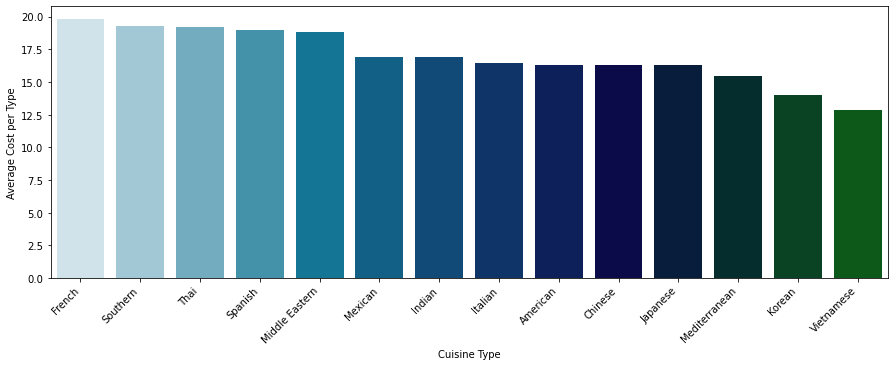

In [28]:
plt.figure(figsize=(15,5))
#now data source is the variable 'every' and we ordering with this order as the table uppon. 
sns.barplot(x = "cuisine_type", y = "cost_of_the_order", data = every, palette = 'ocean_r', order=every['cuisine_type'])
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost per Type')
plt.xticks(rotation = 45, horizontalalignment='right')
plt.show()

### Cuisine type Vs Delivery time

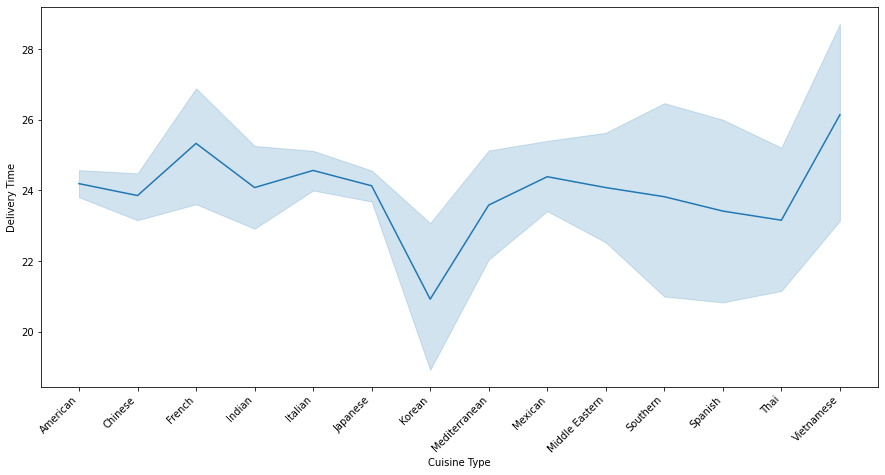

In [29]:
plt.figure(figsize=(15,7))
sns.lineplot(x = "cuisine_type", y = "delivery_time", data = df)
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time')
plt.xticks(rotation = 45, horizontalalignment='right')
plt.show()

### Cuisine type Vs Cost of Order

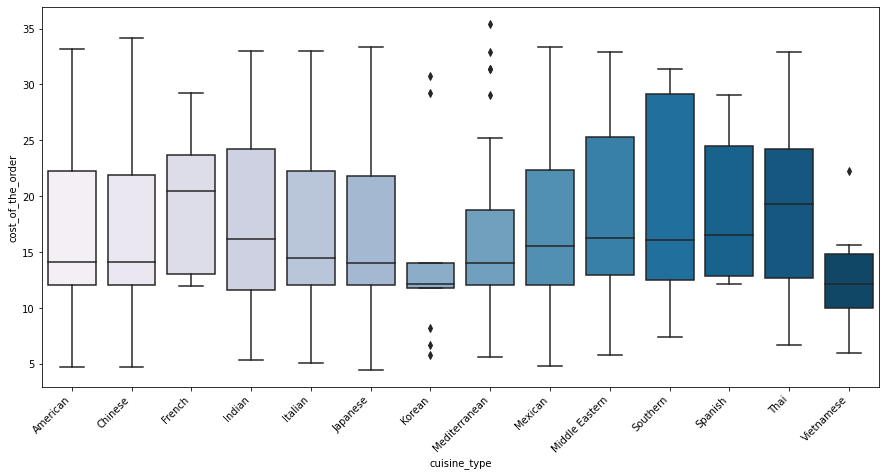

In [30]:
#a boxplot that shows as min,max as well as 25%, 50% and 75% of the order costs. Diamonds values are outliers
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 45, horizontalalignment='right')
plt.show()

### Cuisine type vs Food Preparation time

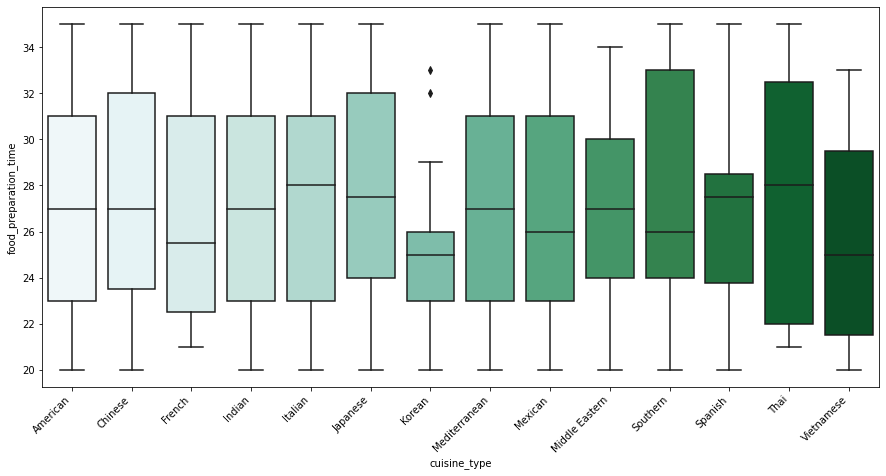

In [31]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'BuGn')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 45, horizontalalignment='right')
plt.show()

### Day of the Week vs Delivery time

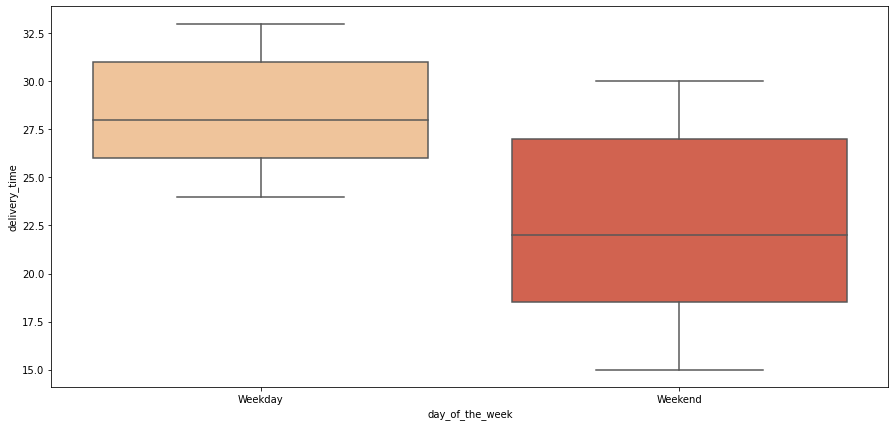

In [32]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'OrRd')
plt.show()

### Cuisine type Vs Cost of orders

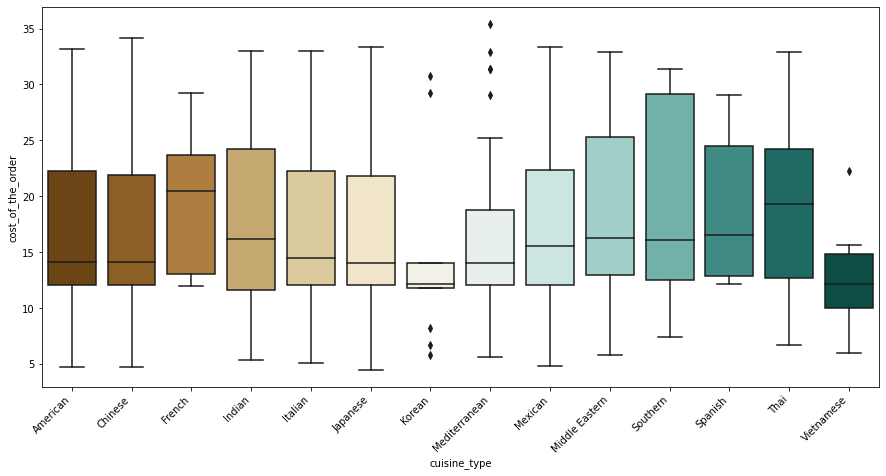

In [33]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'BrBG')
plt.xticks(rotation = 45, horizontalalignment='right')
plt.show()

### Rating vs Delivery time

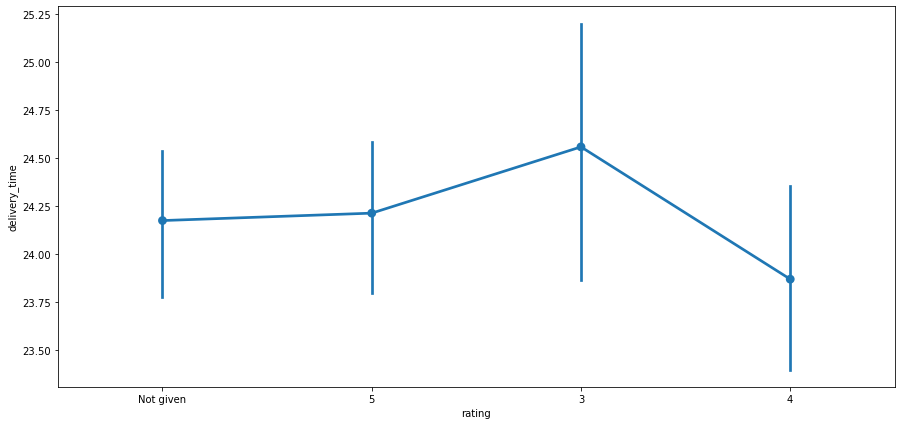

In [34]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

### Rating vs Food preparation time

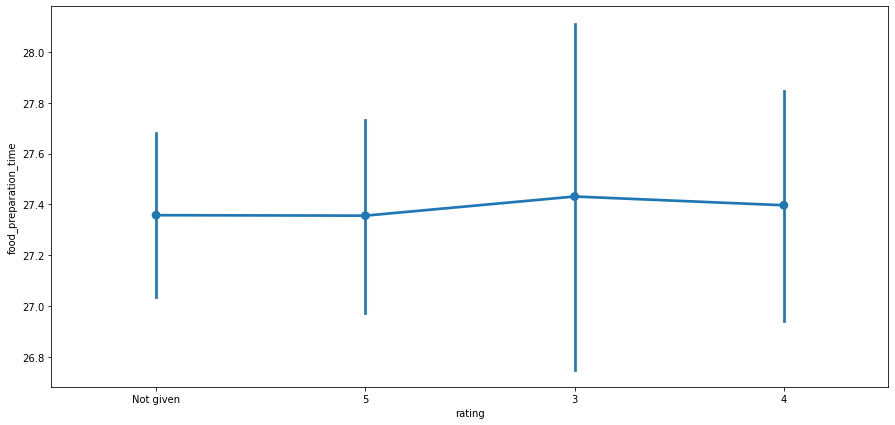

In [35]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

### Rating vs Cost of the order

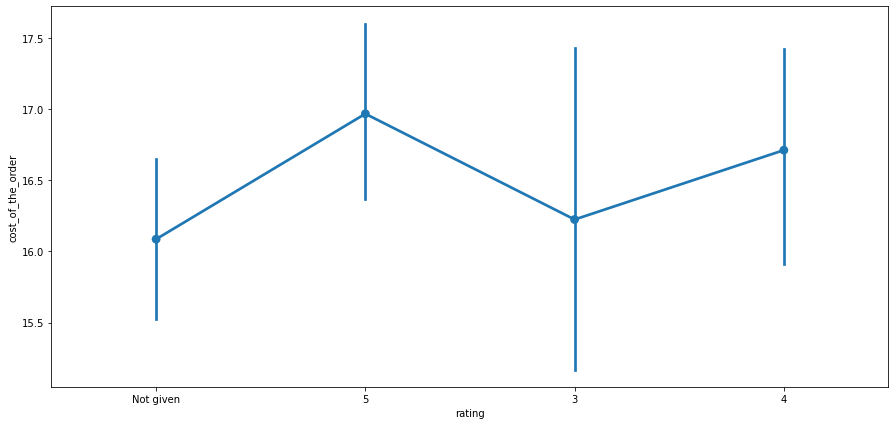

In [36]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

### Number of Order per Cuisine type on Weekdays and Weekends 

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

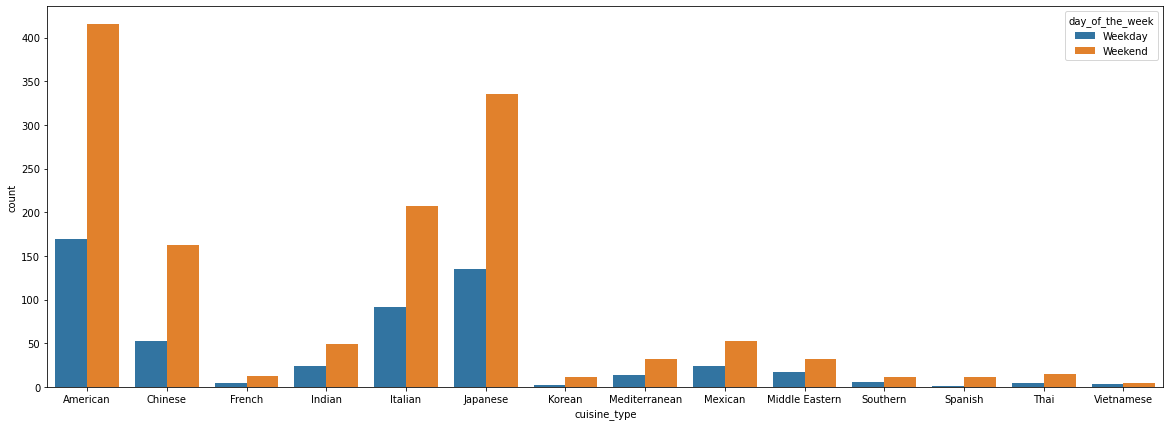

In [37]:
plt.figure(figsize=(20,7))
sns.countplot(x="cuisine_type", hue='day_of_the_week', data=df)

### Correlation among variables

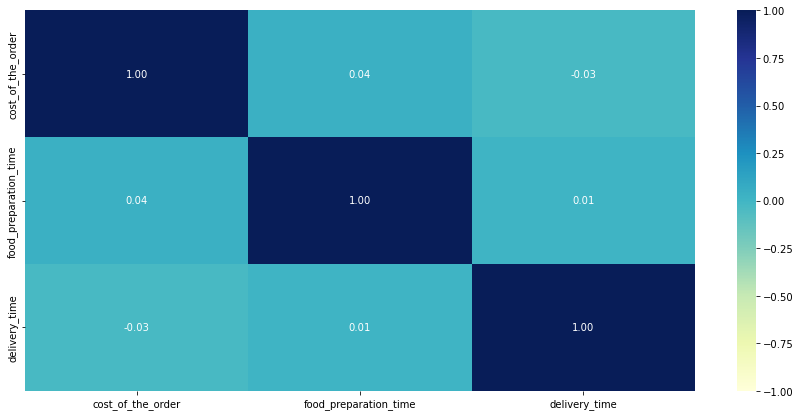

In [38]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="YlGnBu")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [39]:
#as soon as the 'rating' column is converted to integer
#Rated is the dataframe in which the rating column is integer and without the 'Not given' values.
over50 = Rated['restaurant_name'].value_counts().loc[lambda x : x>50].reset_index()
over50.columns = ['restaurant_name', 'num_of_ratings']
print('THE RESTAURANTS WITH MORE THAN 50 RATINGS')
over50

THE RESTAURANTS WITH MORE THAN 50 RATINGS


,restaurant_name,num_of_ratings
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [40]:
# extracted from Rated the restaurant names which only are at the over50 table.
avg4_plus = Rated[Rated['restaurant_name'].isin(over50['restaurant_name'])]
#printing a sample to make sure of the result
avg4_plus.sample(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
837,1476686,45396,Blue Ribbon Sushi,Japanese,16.44,Weekend,5,30,29
1819,1478285,113817,Blue Ribbon Fried Chicken,American,12.18,Weekend,4,32,22
1420,1477305,45846,The Meatball Shop,American,24.20,Weekend,5,21,30
37,1476871,118709,The Meatball Shop,Italian,24.30,Weekday,4,31,29
1238,1477653,142619,Shake Shack,American,12.13,Weekend,5,26,26
1800,1477141,66331,Shake Shack,American,24.30,Weekend,5,21,24
791,1477059,67487,Blue Ribbon Sushi,Japanese,17.07,Weekend,4,27,15
949,1478429,355090,Shake Shack,American,22.85,Weekend,5,24,23
322,1477834,22405,The Meatball Shop,Italian,20.18,Weekend,4,32,26
818,1477452,107240,Shake Shack,American,8.34,Weekend,5,21,30


In [41]:
# grouping the avg4_plus to find the average rating from those restaurants and if they fulfill companys request.
avg4_plus.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
- There are only 4 restaurants that they fulfill the criteria in order to get the promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [42]:
# create a list of our conditions
conditions = [
    (df['cost_of_the_order'] <= 5),
    (df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20),
    (df['cost_of_the_order'] > 20),
    ]
# create a list of the values we want to assign for each condition
values = [ df['cost_of_the_order'],  df['cost_of_the_order']*0.15,  df['cost_of_the_order']*0.25]
# create a new column and use np.select to assign values to it using our lists as arguments
df['net_revenue'] = np.select(conditions, values)

#move 'net_revenue' column to the left
df = df[['order_id', 'customer_id', 'restaurant_name', 'cuisine_type', 'cost_of_the_order', 'net_revenue', 'day_of_the_week', 'rating', 'food_preparation_time', 'delivery_time']]
# display the updated DataFrame
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,net_revenue,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,7.6875,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,1.8120,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,1.8345,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,7.3000,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,1.7385,Weekday,4,25,24


In [43]:
#Calculating the whole company's profit with sum()
profit = df['net_revenue'].sum()
print('The net revenue is ',round(profit,2),' dollars')

The net revenue is  6209.04  dollars


### Net revenue Vs Cuisine type
#### for later use

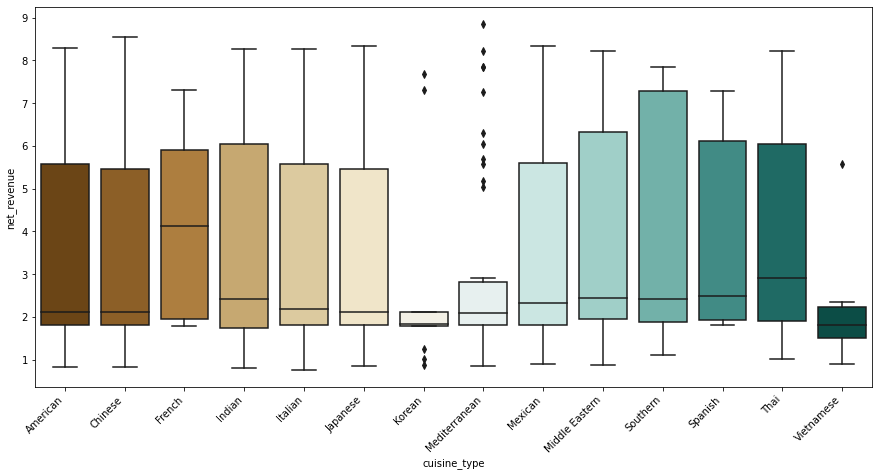

In [44]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "net_revenue", data = df, palette = 'BrBG')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.xticks(rotation = 45, horizontalalignment='right')
plt.show()

### Average Revenue of Cuisine type

In [45]:
# grouping the dataset to the net revenue mean value of every cuisine type
net_mean = df.groupby(['cuisine_type'])['net_revenue'].mean()
# sort values from highest to lowest
netery = net_mean.sort_values(ascending=False).reset_index()
netery

,cuisine_type,net_revenue
0,French,4.232917
1,Thai,4.108026
2,Southern,4.044324
3,Middle Eastern,3.950071
4,Spanish,3.936375
5,Mexican,3.396662
6,Indian,3.383479
7,Italian,3.244579
8,American,3.240640
9,Chinese,3.231584


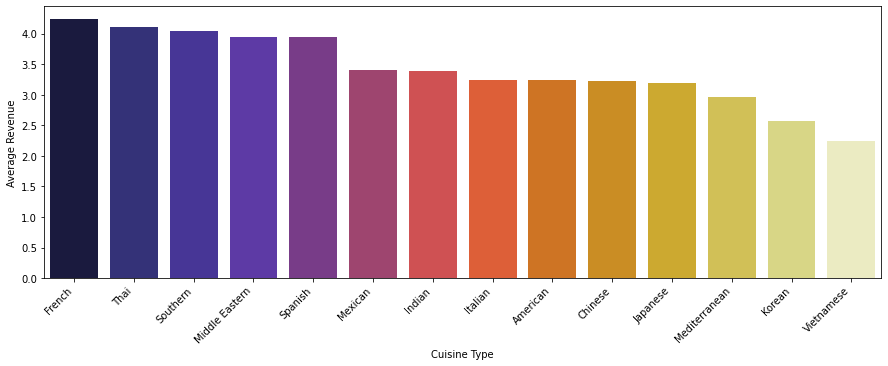

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(x = "cuisine_type", y = "net_revenue", data = netery, palette = 'CMRmap', order=netery['cuisine_type'])
plt.xlabel('Cuisine Type')
plt.ylabel('Average Revenue')
plt.xticks(rotation = 45, horizontalalignment='right')
plt.show()

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [47]:
# Write the code here
total_time = df['food_preparation_time'] + df['delivery_time']
#with normalize true in value_counts we receive the percentages of this table
perc_60_plus = total_time.value_counts(normalize=True).sort_index()
perc_60_plus

35    0.001581
36    0.008430
37    0.008430
38    0.014752
39    0.011591
40    0.024236
41    0.014752
42    0.021075
43    0.029505
44    0.024236
45    0.032666
46    0.044257
47    0.045311
48    0.049526
49    0.053214
50    0.056902
51    0.056902
52    0.041623
53    0.052687
54    0.065859
55    0.051106
56    0.058483
57    0.028978
58    0.043730
59    0.031085
60    0.023709
61    0.027924
62    0.021075
63    0.017387
64    0.017914
65    0.010011
66    0.002634
67    0.004742
68    0.003688
dtype: float64

In [48]:
# summarize sum() the percentages after the 60th index (loc[60:]) in our case minutes.  
print('The percentage of orders that take more than 60 minutes to get delivered is round '+str(perc_60_plus.loc[60:].sum().round(4)*100)+'%')

The percentage of orders that take more than 60 minutes to get delivered is round 12.91%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [49]:
# defining variables for our analysis with the following creteria as requested.
mon_fr = df[df['day_of_the_week'] == 'Weekday']
sat_su = df[df['day_of_the_week'] == 'Weekend']

# we print the average value of them 
print('Weekdays: ', round((mon_fr['delivery_time'].mean()), 2),'minutes')
print('Weekends: ', round((sat_su['delivery_time'].mean()), 2),'minutes')

Weekdays:  28.34 minutes
Weekends:  22.47 minutes


#### Observations:
- As we can see the delivery time is much longer during the weekdays. That can propably depends to working times and traffic. As soon as we don't have more data about the conditions such weather, traffic etc. we cannot explain the reason of why it takes more time on weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusion
- French Cuisine brings the most profit percentage. Spanish is the most well-rated. Unfortunately, Vietnamise and Korean are the worst on both cases.
- American food is the most popular on weekdays as well as on weekends. Japanese, Italian and Chinese follow in popularity.
- Korean & Mediterranean cuisines seem to have many outliers.
- Delivery time on weekends is shorter rather than on the weekdays.
- 87% of the orders arrive between 35 and 60 minutes after ordering. Round 13% after 60 minutes. 
- The top-4 well-rated restaurants are 1 italian, 2 americans and 1 japanese. Exactly the same restaurants are the most-rated too.
- More than 38% of the orders haven't submited any rate value. 'Not given' ratings has no relationship with the delay at transfer time.
- There is no strong relationship between the columns with numerical values as we can see on heatmap (food preparation time, delivery time, cost of order).
- Order prices for Mediterranean cuisine vary tremendously. 
- Low cost orders don't seem to be the quickest in preparation time.


### Recommendations

- Most profitable cuisines such as French and Thai need to be better promoted or advertised in order to receive more orders.
- In same way Spanish, Thai and Indian due to their high customer satisfaction ratings should be advertised. Their delivery time is also very good. Improvement at their company's profit also is necessary. 
- The total delivery time has to be dicreased at least for the weekdays.
- American and Japanese cuisine are the most popular, about 55% of the whole orders belong to these two types. Revenue from the other side is unter the middle value.
- Vietnamise and Korean must improve in order to receive more orders.
- Need of more data and more data types like "day, time, holiday, weather to make safer results.
- One reason that american and japanese restaurant are mostly prefered is because the range of time for delivery for both cuisine types are the shorter. That is very important for the 'hectic' lifestyle ! Maybe need of improvement to the other types too.
- 634 of the 1899 orders belong to 5 same restaurants. They are the same as those that fullfil the creteria for promotional offer and i totally agree for that offer. 
